In [0]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
import seaborn as sns

In [0]:
data = load_iris()

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
ind = data.data

In [0]:
print(ind[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Finding the optimal number of clusters to be used in K Means clustering

In [0]:
k = range(1,10)
distortions = []
for num in k:
  km = KMeans(n_clusters=num).fit(ind)
  distortions.append(sum(np.min(cdist(ind, km.cluster_centers_, 'euclidean'), axis=1)) / ind.shape[0])

## Elbow plot/scree plot using the optimal K found above

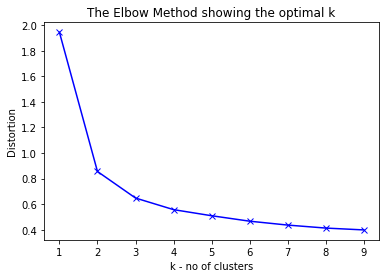

In [8]:
plt.plot(k, distortions, 'bx-')
plt.xlabel('k - no of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
km = KMeans(n_clusters=3).fit(ind)
print(set(km.labels_))
centroids = (km.cluster_centers_)
print(km.labels_)


{0, 1, 2}
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


## Assigning the newly found centroids to a new column

In [13]:
df = pd.DataFrame(ind,columns = data.feature_names)
df['centroids'] = km.labels_
print(df.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  centroids
0                5.1               3.5  ...               0.2          2
1                4.9               3.0  ...               0.2          2
2                4.7               3.2  ...               0.2          2
3                4.6               3.1  ...               0.2          2
4                5.0               3.6  ...               0.2          2

[5 rows x 5 columns]


## Lets see how the centroids found using K means look like

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


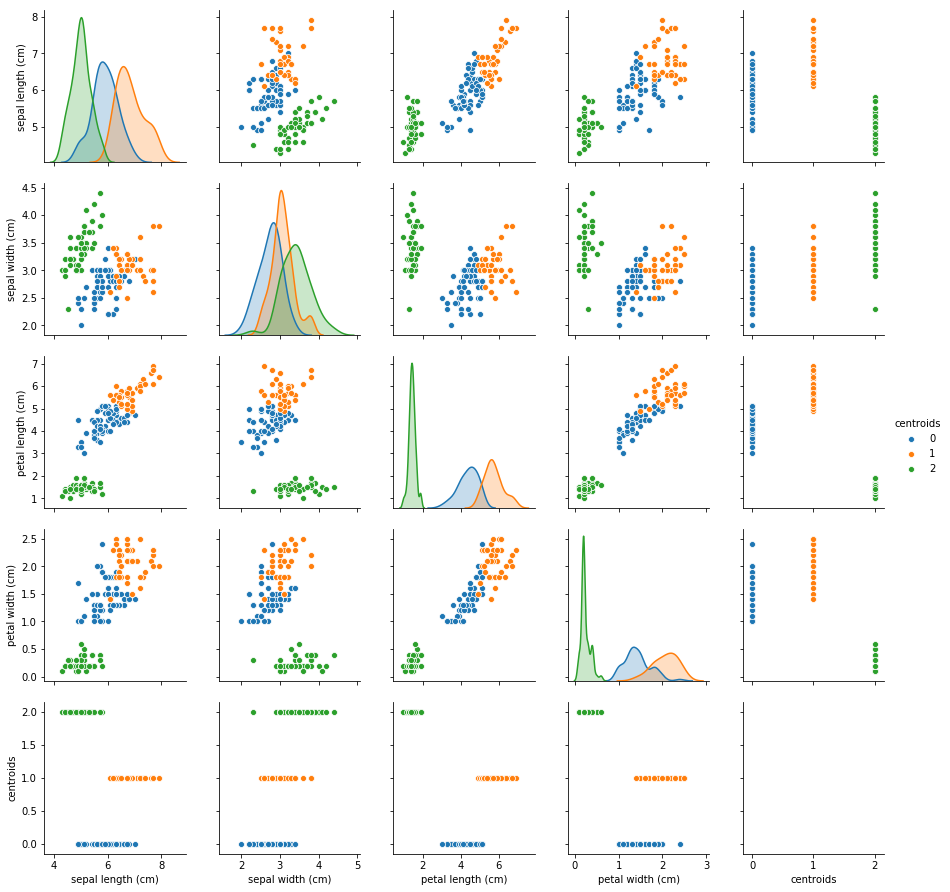

In [14]:
sns.pairplot(df, hue ='centroids')

## Creating a column with actual/correct labels. Lets compare them with the clusters found by K Means algorithm

In [15]:
df['labels'] = data.target
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'centroids', 'labels'],
      dtype='object')


## Plotting using the actual labels. Lets compare both plots and see if its similar.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


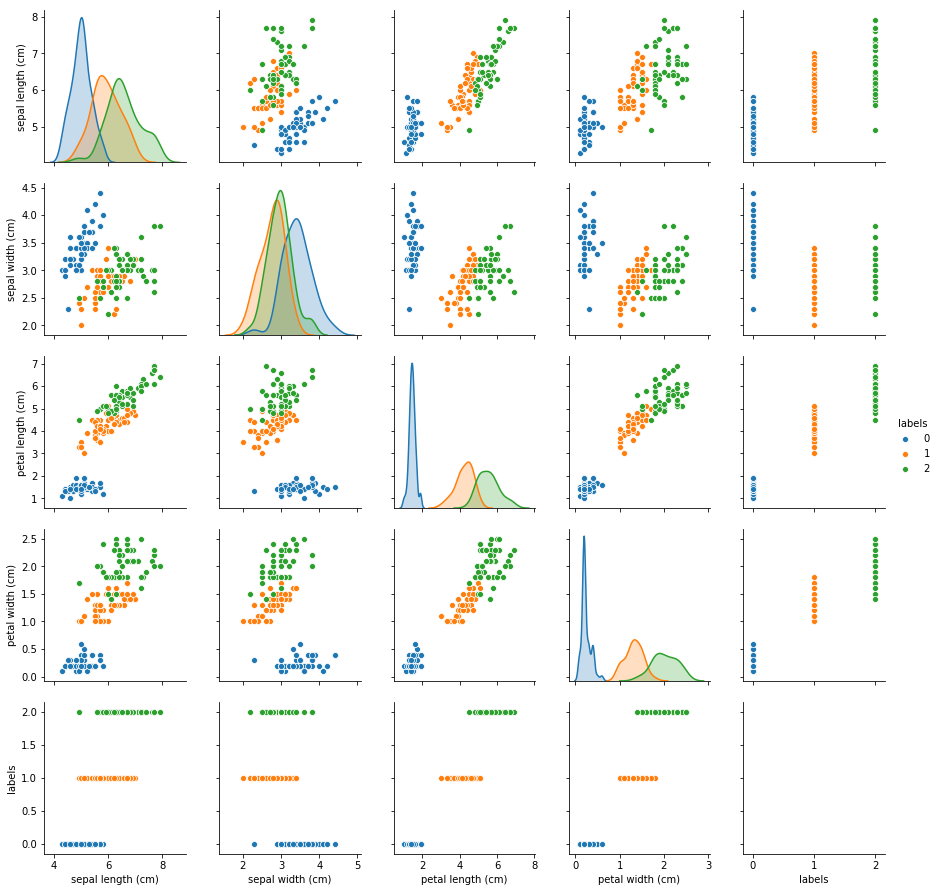

In [16]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)','labels']
sns.pairplot(df[cols], hue = 'labels')